In [20]:
from SmartHandDataset import SmartHandDataset
from utils import get_hand_mask_548, get_palm_mask_484
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [4]:
MAT_PATH = "smarthand_dataset.mat"
mask_548 = get_hand_mask_548()
GRID_SHAPE = (32, 32)
GRID_SIZE = 1024

In [5]:
filename = "smarthand_dataset.mat"
data = sio.loadmat(filename, squeeze_me=True)
pressure = data['tactile_data'].flatten()  # Shape becomes (347986496,) = 339989 * 1024

In [6]:
np.min(pressure)

1460

# Pressure Data Distribution

Different types of normalizations:

per pixel for whole dataset:    'px' \
per pixel per session:          'px-sess'\
whole dataset:                  'full'\
per session:                    'sess'\
per frame for whole dataset:    'fr'\
per frame per session:          'fr-sess'

### Tactile data distribution per session

In [21]:
# Load the data (assuming SmartHandDataset is defined)
ds_norm = SmartHandDataset(
    mat_path=MAT_PATH,
    normalize='full',  # Change normalization method here
    valid_only=True,
    hand_mask=get_palm_mask_484(),
)

Computed num_frames as minimum available: 1153
Num frames: 1153, Num sessions: 5, Num classes: 17
Final X shape: (85, 1153, 484), y length: 85, z length: 85


In [22]:
X, y, z = ds_norm.as_matrix()

In [23]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

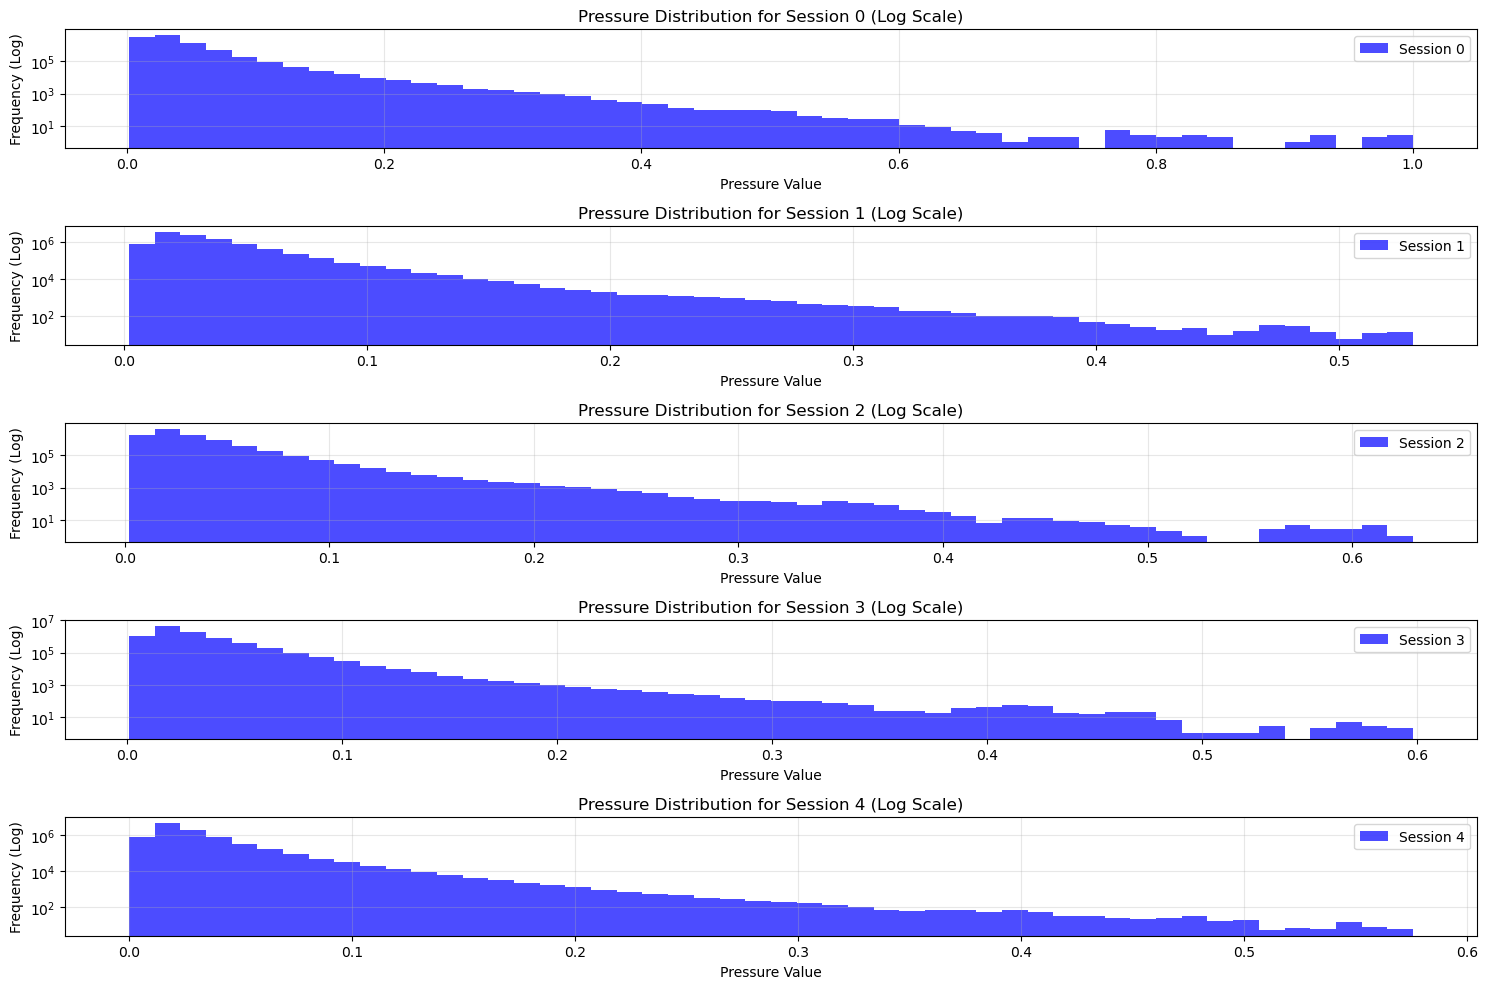

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ds_allf_allp is instantiated
X, y, z = ds_norm.as_matrix()

# Unique sessions from z
unique_sessions = np.unique(z)

# Plot pressure distribution for each session
plt.figure(figsize=(15, 10))

for i, session in enumerate(unique_sessions):
    # Collect pressure values for the current session
    session_indices = np.where(np.array(z) == session)[0]  # Indices in X for this session
    session_pressure = X[session_indices].reshape(-1)  # Flatten all values for this session
    # Plot histogram
    plt.subplot(len(unique_sessions), 1, i + 1)
    plt.hist(session_pressure, bins=50, color='blue', alpha=0.7, label=f'Session {session}')
    plt.yscale('log')  # Log scale for frequency
    plt.title(f'Pressure Distribution for Session {session} (Log Scale)')
    plt.xlabel('Pressure Value')
    plt.ylabel('Frequency (Log)')
    plt.legend()
    plt.grid(True, which="both", alpha=0.3)

plt.tight_layout()
plt.show()

Computed num_frames as minimum available: 3991
Num frames: 3991, Num sessions: 5, Num classes: 17
Final X shape: (85, 3991, 548), y length: 85, z length: 85


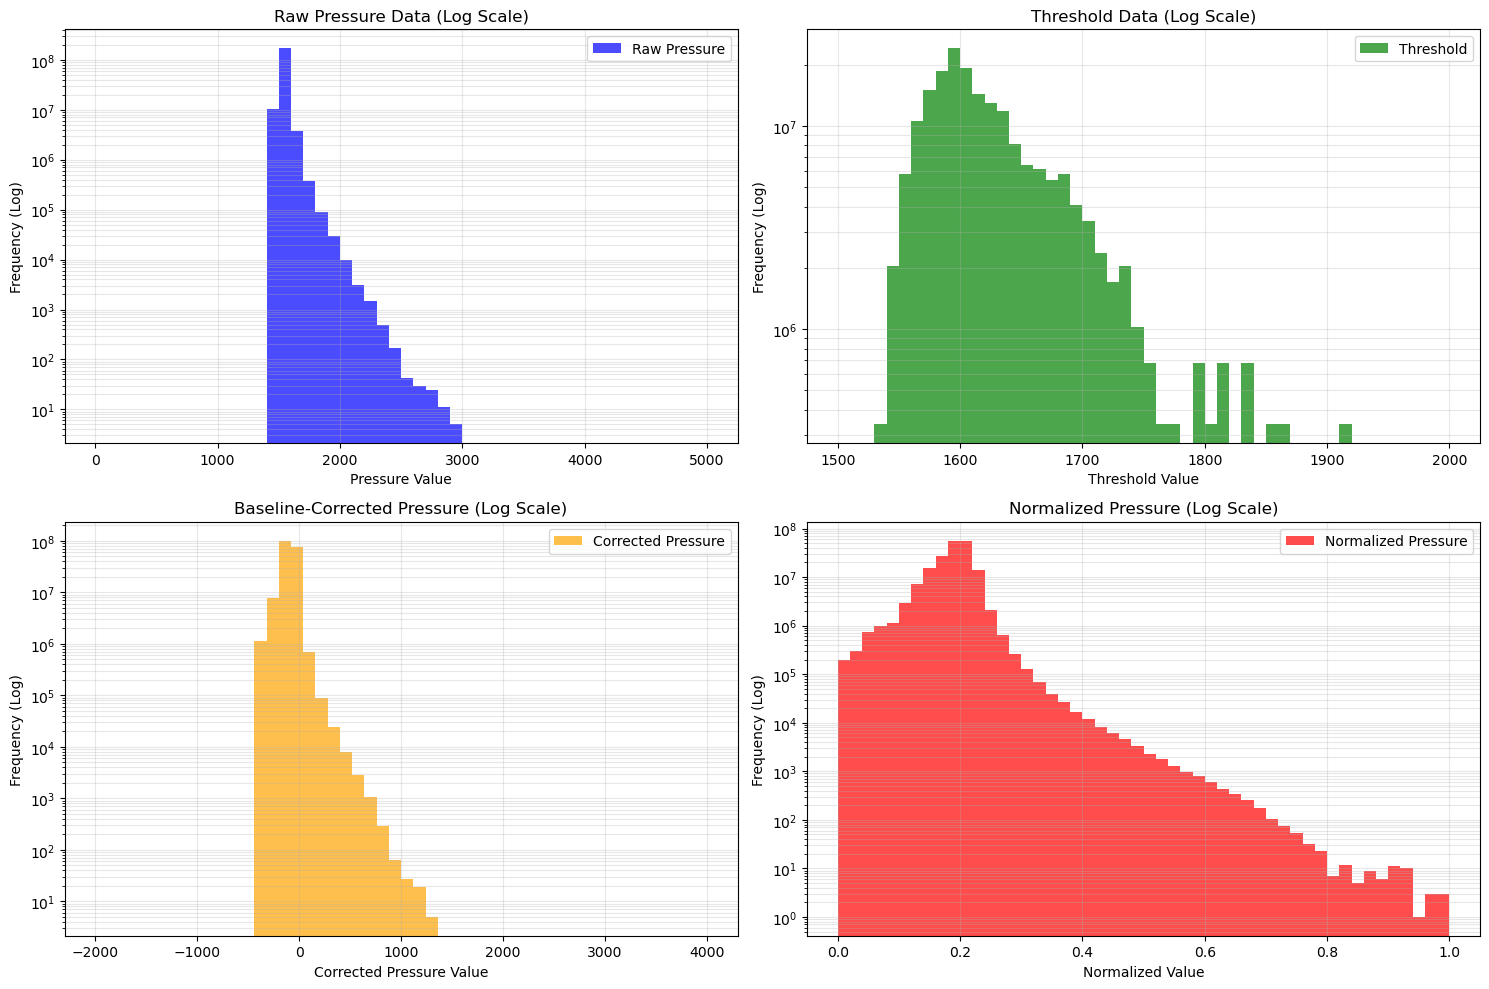

Raw Pressure - Min: 1481.0, Max: 2963.0
Threshold - Min: 1530.0, Max: 1910.0
Corrected Pressure - Min: -419.0, Max: 1280.0
Normalized Pressure - Min: 0.0, Max: 1.0


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ds_allf_allp is instantiated
ds_allf_allp = SmartHandDataset(
    mat_path=MAT_PATH,
)
X, y, z = ds_allf_allp.as_matrix()
tactile = X.reshape(-1, X.shape[-1])  # Flatten to (n_frames * 85, 548)
threshold = np.tile(ds_allf_allp.threshold, (tactile.shape[0], 1))  # Repeat threshold

# Subtract baseline first
tactile_corrected = tactile - threshold

# Normalize the corrected data
tactile_min = np.min(tactile_corrected)
tactile_max = np.max(tactile_corrected)
tactile_normalized = (tactile_corrected - tactile_min) / (tactile_max - tactile_min)

# Plot histograms with log scale and adjusted ranges
plt.figure(figsize=(15, 10))

# 1. Raw Pressure Data
plt.subplot(2, 2, 1)
plt.hist(tactile.flatten(), bins=50, range=(0, 5000), color='blue', alpha=0.7, label='Raw Pressure')
plt.yscale('log')
plt.title('Raw Pressure Data (Log Scale)')
plt.xlabel('Pressure Value')
plt.ylabel('Frequency (Log)')
plt.legend()
plt.grid(True, which="both", alpha=0.3)

# 2. Threshold Data
plt.subplot(2, 2, 2)
plt.hist(threshold.flatten(), bins=50, range=(1500, 2000), color='green', alpha=0.7, label='Threshold')
plt.yscale('log')
plt.title('Threshold Data (Log Scale)')
plt.xlabel('Threshold Value')
plt.ylabel('Frequency (Log)')
plt.legend()
plt.grid(True, which="both", alpha=0.3)

# 3. Baseline-Corrected Data
plt.subplot(2, 2, 3)
plt.hist(tactile_corrected.flatten(), bins=50, range=(-2000, 4000), color='orange', alpha=0.7, label='Corrected Pressure')
plt.yscale('log')
plt.title('Baseline-Corrected Pressure (Log Scale)')
plt.xlabel('Corrected Pressure Value')
plt.ylabel('Frequency (Log)')
plt.legend()
plt.grid(True, which="both", alpha=0.3)

# 4. Normalized Data
plt.subplot(2, 2, 4)
plt.hist(tactile_normalized.flatten(), bins=50, range=(0, 1), color='red', alpha=0.7, label='Normalized Pressure')
plt.yscale('log')
plt.title('Normalized Pressure (Log Scale)')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency (Log)')
plt.legend()
plt.grid(True, which="both", alpha=0.3)

plt.tight_layout()
plt.show()

# Print min/max
print(f"Raw Pressure - Min: {np.min(tactile)}, Max: {np.max(tactile)}")
print(f"Threshold - Min: {np.min(threshold)}, Max: {np.max(threshold)}")
print(f"Corrected Pressure - Min: {np.min(tactile_corrected)}, Max: {np.max(tactile_corrected)}")
print(f"Normalized Pressure - Min: {np.min(tactile_normalized)}, Max: {np.max(tactile_normalized)}")

In [10]:
ds_allf_onlyhand = SmartHandDataset(
    mat_path=MAT_PATH,
    valid_only=False,
    subtract_baseline=False,
    hand_mask=mask_548
)

Computed num_frames as minimum available: 3991
Num frames: 3991, Num sessions: 5, Num classes: 17
Final X shape: (85, 3991, 548), y length: 85, z length: 85


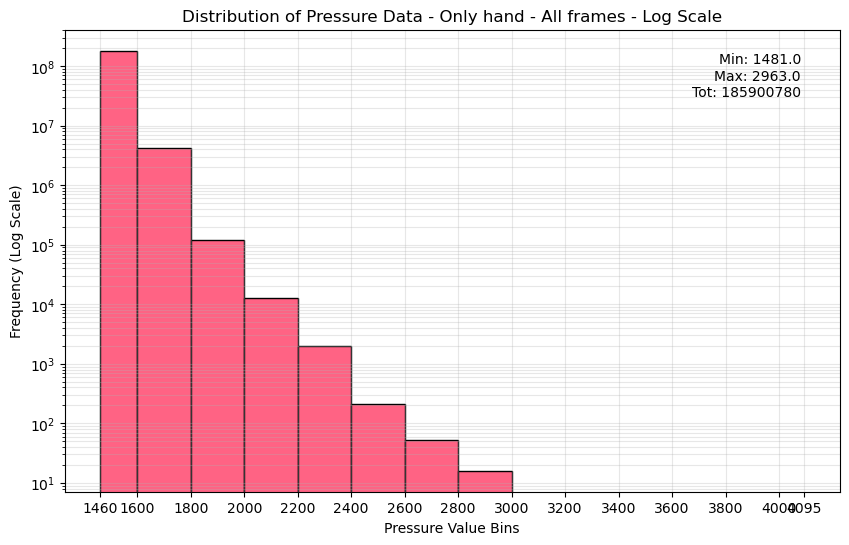

In [11]:
pressure = ds_allf_onlyhand.as_matrix()[0].flatten()
# Define bins based on the observed range
bins = [1460, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4095]

# Create histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pressure, bins=bins, edgecolor='black', color='#FF6384')

# Customize the plot with logarithmic y-axis
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Distribution of Pressure Data - Only hand - All frames - Log Scale')
plt.xlabel('Pressure Value Bins')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.3)  # Grid for both major and minor ticks
plt.xticks(bins)  # Ensure all bin edges are labeled

# Add text with min and max values
plt.text(0.95, 0.95, f'Min: {np.min(pressure)}\nMax: {np.max(pressure)}\nTot: {len(pressure)}',
         transform=plt.gca().transAxes, ha='right', va='top')

# Show the plot
plt.show()

In [12]:
ds_onlyvalid_onlyhand = SmartHandDataset(
    mat_path=MAT_PATH,
    valid_only=True,
    subtract_baseline=False,
    hand_mask=mask_548
)

Computed num_frames as minimum available: 1153
Num frames: 1153, Num sessions: 5, Num classes: 17
Final X shape: (85, 1153, 548), y length: 85, z length: 85


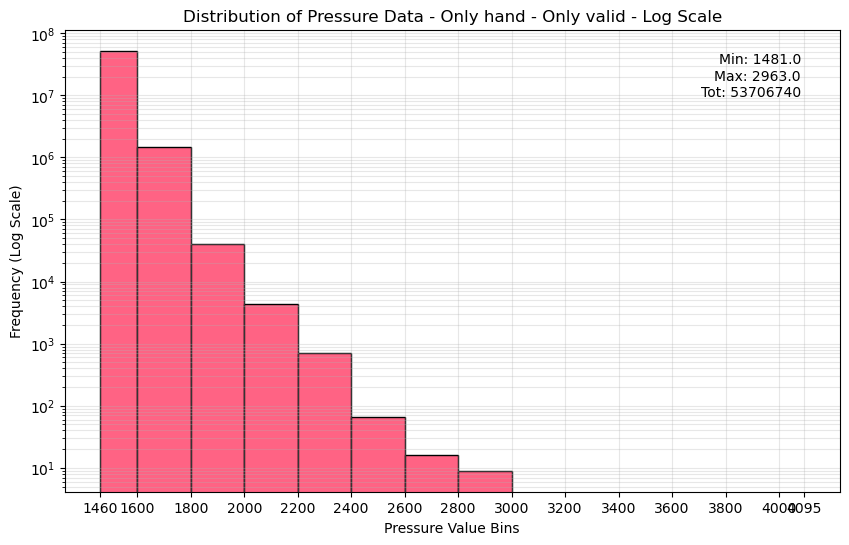

In [13]:
pressure = ds_onlyvalid_onlyhand.as_matrix()[0].flatten()
# Define bins based on the observed range
bins = [1460, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4095]

# Create histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pressure, bins=bins, edgecolor='black', color='#FF6384')

# Customize the plot with logarithmic y-axis
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Distribution of Pressure Data - Only hand - Only valid - Log Scale')
plt.xlabel('Pressure Value Bins')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.3)  # Grid for both major and minor ticks
plt.xticks(bins)  # Ensure all bin edges are labeled

# Add text with min and max values
plt.text(0.95, 0.95, f'Min: {np.min(pressure)}\nMax: {np.max(pressure)}\nTot: {len(pressure)}',
         transform=plt.gca().transAxes, ha='right', va='top')

# Show the plot
plt.show()

# Frames and Classes

In [15]:
ds = SmartHandDataset(
    mat_path=MAT_PATH,
    valid_only=True,
    subtract_baseline=True,
    hand_mask=mask_548
)

X, y, sessions = ds.as_matrix()
objects = ds.objects  # id -> name mapping

# build a tidy dataframe for plotting
df = pd.DataFrame({
    "object_id": y,
    "session": sessions
})
df["object"] = df["object_id"].map(lambda oid: objects[int(oid)])

Computed num_frames as minimum available: 1153
Num frames: 1153, Num sessions: 5, Num classes: 17
Final X shape: (85, 1153, 548), y length: 85, z length: 85


In [16]:
X.shape

(85, 1153, 548)

# Values

In [20]:
# A) all tassels (1024)
ds_all = SmartHandDataset(
    mat_path=MAT_PATH,
    valid_only=False,
    subtract_baseline=False,
    hand_mask=None
)

# B) only hand tassels (548)
ds_hand = SmartHandDataset(
    mat_path=MAT_PATH,
    valid_only=True,
    subtract_baseline=True,
    hand_mask=mask_548
)

print("ALL tassels:", ds_all.shapes(), " (frames, features)")
print("HAND tassels:", ds_hand.shapes(), " (frames, features)")


Computed num_frames as minimum available: 3991
Num frames: 3991, Num sessions: 5, Num classes: 17
Final X shape: (85, 3991, 1024), y length: 85, z length: 85
Computed num_frames as minimum available: 1153
Num frames: 1153, Num sessions: 5, Num classes: 17
Final X shape: (85, 1153, 548), y length: 85, z length: 85
ALL tassels: (85, 3991, 1024)  (frames, features)
HAND tassels: (85, 1153, 548)  (frames, features)


In [21]:
ds_all.as_matrix()[0].shape

(85, 3991, 1024)

In [22]:
ds_all.as_matrix()[0][0][:20]

array([[1647., 1537., 1569., ..., 1497., 1500., 1497.],
       [1649., 1537., 1566., ..., 1497., 1496., 1495.],
       [1643., 1535., 1569., ..., 1498., 1497., 1499.],
       ...,
       [1625., 1522., 1560., ..., 1497., 1497., 1498.],
       [1607., 1530., 1564., ..., 1497., 1498., 1498.],
       [1608., 1526., 1562., ..., 1494., 1498., 1501.]], dtype=float32)

## Mean Map

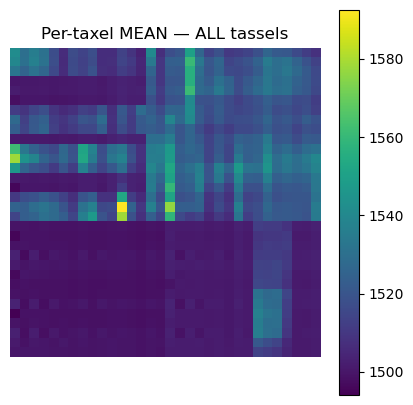

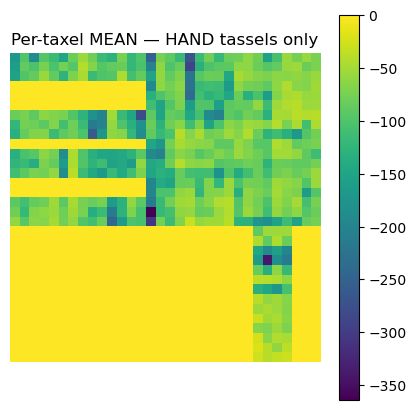

In [23]:
# compute per-feature mean
Xa, _, _= ds_all.as_matrix()
Xh, _, _= ds_hand.as_matrix()

mean_all = Xa.mean(axis=(0, 1))
mean_hand = Xh.mean(axis=(0, 1))

# Find indices for all tassels and hand tassels
ka = np.arange(1024)  # all indices
kh = np.where(mask_548)[0]  # hand indices

# Fill full arrays for visualization
full_mean_all = np.zeros(1024, dtype=mean_all.dtype)
full_mean_all[ka] = mean_all.flatten()

full_mean_hand = np.zeros(1024, dtype=mean_hand.dtype)
full_mean_hand[kh] = mean_hand.flatten()

plt.figure(figsize=(5,5))
im = plt.imshow(full_mean_all.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel MEAN — ALL tassels"); plt.axis("off"); plt.colorbar(im); plt.show()

plt.figure(figsize=(5,5))
im = plt.imshow(full_mean_hand.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel MEAN — HAND tassels only"); plt.axis("off"); plt.colorbar(im); plt.show()


## Variance Map

In [26]:
var_all = Xa.var(axis=0)
var_hand = Xh.var(axis=0)

full_var_all = np.zeros(1024); full_var_all[ka] = var_all
full_var_hand = np.zeros(1024); full_var_hand[kh] = var_hand

plt.figure(figsize=(5,5))
im = plt.imshow(full_var_all.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel VAR — ALL tassels"); plt.axis("off"); plt.colorbar(im); plt.show()

plt.figure(figsize=(5,5))
im = plt.imshow(full_var_hand.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel VAR — HAND tassels only"); plt.axis("off"); plt.colorbar(im); plt.show()


ValueError: shape mismatch: value array of shape (3991,1024) could not be broadcast to indexing result of shape (1024,)

## Range Maps

In [27]:
rng_all = Xa.max(axis=0) - Xa.min(axis=0)
rng_hand = Xh.max(axis=0) - Xh.min(axis=0)

full_rng_all = np.zeros(1024); full_rng_all[ka] = rng_all
full_rng_hand = np.zeros(1024); full_rng_hand[kh] = rng_hand

plt.figure(figsize=(5,5))
im = plt.imshow(full_rng_all.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel RANGE — ALL tassels"); plt.axis("off"); plt.colorbar(im); plt.show()

plt.figure(figsize=(5,5))
im = plt.imshow(full_rng_hand.reshape(32,32), interpolation="nearest")
plt.title("Per-taxel RANGE — HAND tassels only"); plt.axis("off"); plt.colorbar(im); plt.show()


ValueError: shape mismatch: value array of shape (3991,1024) could not be broadcast to indexing result of shape (1024,)